<center>
    <h1 style="color:red;">Apprentissage Automatique Numérique</h1>
    <h2> TP Perceptron </h2>
    <p> Auteur: Killian MARCHAND </p>
</center>


<h3 style="color:green;"> Importation de librairies</h3>

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

<h2 style="color:blue;"> 1. Préparer les données : coder les données textuelles en valeurs numériques </h2>

In [3]:
myData = [line.rstrip('\n').split(',') for line in open('house-votes-84.data')]

nameData = ["Class Name",
           "handicapped-infants",
           "water-project-cost-sharing",
           "adoption-of-the-budget-resolution",
           "physician-fee-freeze",
           "el-salvador-aid",
           "religious-groups-in-schools",
           "anti-satellite-test-ban",
           "aid-to-nicaraguan-contras",
           "mx-missile",
           "immigration",
           "synfuels-corporation-cutback",
           "education-spending",
           "superfund-right-to-sue",
           "crime",
           "duty-free-exports",
           "export-administration-act-south-africa"
            ]

House_vote = pd.DataFrame(myData)
House_vote.columns = nameData

House_vote.head()

House_vote


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [4]:
def char2num(x):
    if x == 'n': x = -1
    elif x == 'y': x = 1
    elif x == '?': x = 0
     
    return x

House_vote = House_vote.applymap(char2num)
House_vote

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1
431,democrat,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1
432,republican,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1
433,republican,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1


In [5]:
#Mélange des données
House_vote = shuffle(House_vote, random_state = 12345)

#Données de Validation
ValidationData = House_vote[:100]
ValidationDataClass = ValidationData['Class Name']
ValidationData = ValidationData.drop(['Class Name'], axis = 1)



#Données d'entrainement
TrainData = House_vote[100:]
TrainDataClass = TrainData['Class Name']
TrainData = TrainData.drop(['Class Name'], axis = 1)



<h2 style="color:blue;"> 2. Ecrire une fonction classify qui permet de donner l’étiquette d’une observation à partir d'un vecteur de poids </h2>

In [6]:
#vect_poids = TrainData.sum() 
vect_poids = np.zeros(len(TrainData.columns))
#vect_poids = np.ones(len(TrainData.columns))
vect_poids = pd.Series(vect_poids)
vect_poids = vect_poids.rename("Poids")
vect_poids

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
Name: Poids, dtype: float64

In [7]:
etiquette = {}

def classify(data, poids):
    res = np.dot(data, poids) +1
    for index in range(len(res)):
        if res[index] >= 0: 
            etiquette[index] = "republican" 
        elif res[index] < 0: 
            etiquette[index] = "democrat"
    res = []
    return(pd.Series(etiquette))
    
#classificationData = classify(TrainData, vect_poids)

In [8]:
#classificationData = classificationData.rename("Class Name")
#classificationData

In [9]:
TrainDataClass

372      democrat
394      democrat
414      democrat
432    republican
87     republican
          ...    
382      democrat
425      democrat
420    republican
129      democrat
285      democrat
Name: Class Name, Length: 335, dtype: object

In [10]:
def test(data, verifData):
    return list(data.values == verifData.values).count(False)/len(verifData)

#err = test(classificationData, TrainDataClass)
#print("Taux Erreur: ", err, "\n")

<h2 style="color:blue;"> 4. Implémenter l’algorithme du perceptron dans une fonction train </h2>
<p>
    • Limiter l’apprentissage à un nombre maximum d’itérations <br>
    • Définir et utiliser un autre critère d’arrêt de l’apprentissage <br>
</p>

In [11]:
def train(vect_poids, TrainData, TrainDataClass):
    ite = 500
    errEvo = {}
    all_vect_poids = {}
    i = 0
    err = 1
    nEpoque = 0
    
    for row in range(0,len(TrainData)):
        dataRow = []
        for i in range(1,len(vect_poids)):
            dataRow.append(TrainData.iloc[row,i])
            
        classificationData = classify(TrainData, vect_poids)
            
        if classificationData.values[row] != TrainDataClass.values[row]:
            nEpoque += 1
            err = test(classificationData, TrainDataClass) 
            #print("Taux Erreur: ", err, "\n")  
            errEvo[nEpoque] = err
            all_vect_poids[nEpoque] = vect_poids
               
            if classificationData.values[row] == "republican":
                vect_poids = vect_poids.values + TrainData.iloc[row] * (-1)
            elif classificationData.values[row] == "democrat":
                vect_poids = (vect_poids.values + TrainData.iloc[row]) 
            #print(vect_poids)
            row = 0     #On test toutes les données avec le nouveau poids
                
        if nEpoque > 500:
            temp = min(errEvo, key=errEvo.get)
            #print("min err ", temp)
            vect_poids = all_vect_poids[temp]
            return vect_poids, classificationData, pd.Series(errEvo)
    #print(errEvo)
    temp = min(errEvo, key=errEvo.get)
    #print("min err ", temp)
    vect_poids = all_vect_poids[temp]
    return vect_poids, classificationData, pd.Series(errEvo)
    
vect_poids, perceptronData, errorEvolution = train(vect_poids , TrainData, TrainDataClass)
#print(perceptronData)
#print(TrainDataClass)

Meilleur vecteur poids
.last() handicapped-infants                       -3.0
water-project-cost-sharing                -2.0
adoption-of-the-budget-resolution         -4.0
physician-fee-freeze                      10.0
el-salvador-aid                            1.0
religious-groups-in-schools               -3.0
anti-satellite-test-ban                    3.0
aid-to-nicaraguan-contras                 -1.0
mx-missile                                -4.0
immigration                                1.0
synfuels-corporation-cutback              -4.0
education-spending                         5.0
superfund-right-to-sue                    -2.0
crime                                     -1.0
duty-free-exports                          0.0
export-administration-act-south-africa    -1.0
Name: 199, dtype: float64


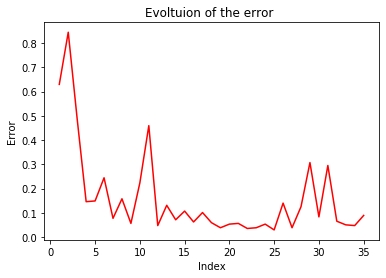

In [12]:
#errorEvolution = pd.DataFrame.from_dict(errorEvolution, orient='index')
#errorEvolution

print('Meilleur vecteur poids\n.last()', vect_poids)

plt.plot(errorEvolution.index, errorEvolution.values, color = 'red')
plt.title("Evoltuion of the error ")
plt.xlabel('Index')
plt.ylabel("Error");

<h2 style="color:blue;">5. Utilisation du vecteur de poids déteriné sur les données de validation </h2>

In [13]:
ValidationData

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
33,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1
213,-1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,-1,1,1
55,-1,1,-1,1,1,1,-1,-1,-1,1,1,1,1,1,-1,-1
256,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1
398,-1,1,1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-1,1,-1,1,1,1,-1,0,-1,-1,0,0,0,1,-1,0
154,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,-1
10,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1
222,1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,0


In [14]:
ClassifValidData = classify(ValidationData, vect_poids)
print("Données de prédiction à partir du corpus de validation")
ClassifValidData

Données de prédiction à partir du corpus de validation


0      republican
1        democrat
2      republican
3      republican
4        democrat
          ...    
330      democrat
331      democrat
332    republican
333      democrat
334      democrat
Length: 335, dtype: object

In [15]:
print(ValidationDataClass)

33     republican
213      democrat
55     republican
256    republican
398      democrat
          ...    
400    republican
154    republican
10     republican
222      democrat
345    republican
Name: Class Name, Length: 100, dtype: object


In [17]:
err = test(ClassifValidData[:100], ValidationDataClass)
print("Taux d'erreur sur le corpus de validation: ", err)

Taux d'erreur sur le corpus de validation:  0.04
